#                                         BoomBikes Demand Study


---
                                         Completed By Prayag Sanjay in January 2022



## 1. Problem Statment

As a result of recent Corona pandemic, US bike-sharing provider BoomBikes are experiencing considerable drop in their revenues, making it very difficult to survive in the current market scenario.

As a part of a their clever business plan to up revenue, they want to capitalise on the market as soon as lockdown ends. So they need to know the drivers for the demand for the shared bike in American market.


Hence,

### Goals of Study

**1. To find out which variables are significant in predicting the demand for shared bikes.**

**2. How well those variables describe the bike demands ?**

### Business Goals

**1. To build a model to predict the demand for shared bikes.**
   
**2. To explain the dynamics of the demand using the model.**

Based on various meteorological surveys and people's styles, a service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## 2. Data Set

We are give a dataset on daily bike rental across America and various probable factors affecting the bike rental such as a weather conditions, day types such as weekend, holiday and rental type.


## 3. Approach

From the problem statement, we can see following characterstics

1. Business wants to know the driver variables for a specific target, in this case bike demand.
   So there is an expectation of **explainability** from the model.
   

2. Business want to **predict** demand for bikes or dynamics of demand as opposed to forecast the demand for bikes.

Thus this problem falls in realms of **predictive analysis** where we want to interpolate the data. Aa a result of above two reasons we will employ **Linear Regression with multple variables** machine learning method to build the model which will answer the business questions.



## 4.  Setup and Reading the data

#### 4.1 We will import appropriate python libraries for data manipulation, visualization and Linear Regression model building and evaluation

In [1]:
# numpy and pandas for data manipulation

import math
import numpy as np
import pandas as pd 

# Suppress warnings 

import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn with their settings for plotting

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()
%matplotlib inline

# set pandas configuration to show all column data

pd.set_option('display.max_columns', None)

# libaries for Linear Regression data preparation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# libaries for Linear Regression fitting and evaulation

import statsmodels
import statsmodels.api as sm

# libaries for RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# libaries for RFE to find R-Square from test data

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### 4.2 We will load the data.

In [2]:
# Now we will read the data from csv file

bikes = pd.read_csv('day.csv')

## 5. Data quality and validity tests

After having read we will get to know about the data and perform validation and quality tests on it

### 5.1 First check a few rows from the dataset

In [3]:
# Check first few records of the dataset

bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 5.2 Get the column and row counts

In [4]:
# get the shape of the dataset

bikes.shape

(730, 16)

### 5.3 Check whether rows have null values and type of columns

In [5]:
# find information about the dataset

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Observation:**

None of the rows have nulls values, hence no data imputing is requied or any removal of rows or columns is required.

### 5.4 Check for any duplicate rows in the dataset

In [6]:
# Check if there any duplicates

bikes[bikes.duplicated()==True]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


**Observation:**

There are no duplicate rows in the dataset. So no rows needs to be removed.

### 5.5 Also check number of unique values for each columns, to be used in validation later.

In [7]:
# Checking for number of unique valuesin columns

bikes.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

### 5.6 Columns in following array are categorical so getting unique values in each columns to verify if values are valid

In [8]:
# get unqiue values in each of following columns

for var in ['yr', 'holiday', 'workingday', 'weathersit', 'season', 'weekday', 'mnth'] :
    print(var)
    print(bikes[var].unique())
    print('----------------------------')

yr
[0 1]
----------------------------
holiday
[0 1]
----------------------------
workingday
[0 1]
----------------------------
weathersit
[2 1 3]
----------------------------
season
[1 2 3 4]
----------------------------
weekday
[6 0 1 2 3 4 5]
----------------------------
mnth
[ 1  2  3  4  5  6  7  8  9 10 11 12]
----------------------------


**Observations:**

1. Year, Holiday, working day have only two values viz. 0 and 1, which is correct as per data dictionary.

2. weathersit, season values are all correct as per data dictionary.

3. weekday has correct range values from 0 to 6.

4. mnth has correct range of values from 1 to 12.

5. So data in the dataset is correct as per dictionary and with correct range.

### 5.7 Validating the numerical values to see whether range is ok

In [9]:
# we will check if the numerical data is with in correct range and no apperent outliers

bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Observation:**

Looking at the mean, min and max and co-relating with IQR, there do not seem to be any obvious outliers.
We will check this later using boxplot

### 5.8 Verifying whether total of number bike rented is valid

In [10]:
# checking whether sum of registered and casual user's count is equal to total count(cnt)

bikes[bikes.casual + bikes.registered != bikes.cnt]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


**Observation:**

Total count of users (cnt) is valid in all rows


### 5.9 Verifying the values in holiday, workingday and weekday columns

In [11]:
# check if holiday and working day data is valid by checking if a day is both holiday and working day

bikes[(bikes.holiday == 1) &  (bikes.workingday == 1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


**Observation:**

There is no data where holiday and working day are on same day. Thus data is valid

In [12]:
# check which on which weekday day, non-working or non-holiday fall
bikes[(bikes.holiday == 0) &  (bikes.workingday == 0)]['weekday'].unique()


array([6, 0], dtype=int64)

In [13]:
# check on which day working day falls

bikes[(bikes.workingday == 1)]['weekday'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [14]:
# check on which day holiday falls

bikes[(bikes.holiday == 1)]['weekday'].unique()

array([1, 5, 4, 3, 2], dtype=int64)

**Observation:**

1. Working day is defined as as day from 1 to 5.

2. Holiday is defined as day from 1 to 5 when there is a holiday.

3. On weekday numbers 0 and 6, its not a holiday or working day. That is probably Sunday and Saturday. So weekends are treated differntly than holidays.



## 6. Dropping unnecessary columns

1. Column 'instant' is a simple record index, hence it has no effect on analysis. So it will be dropped.


2. Column 'dteday' is fully qualified by other columns viz. 'season', 'yr', 'mnth', 'holiday', 'weekday' and 'workingday'. 
   So it is redundant and will be dropped.
   
   
3. 'casual' and 'registered' columns add to 'cnt' column, so these are redundant and will be dropped.

In [15]:
#  Drop column 'instant' and 'dtedate' in place

bikes.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

## 7. Visualising Data

### 7.1 Visualising Numerical Data

We will do a pairt plot to see the co-relation of numerical variables with target variable and among themseleves

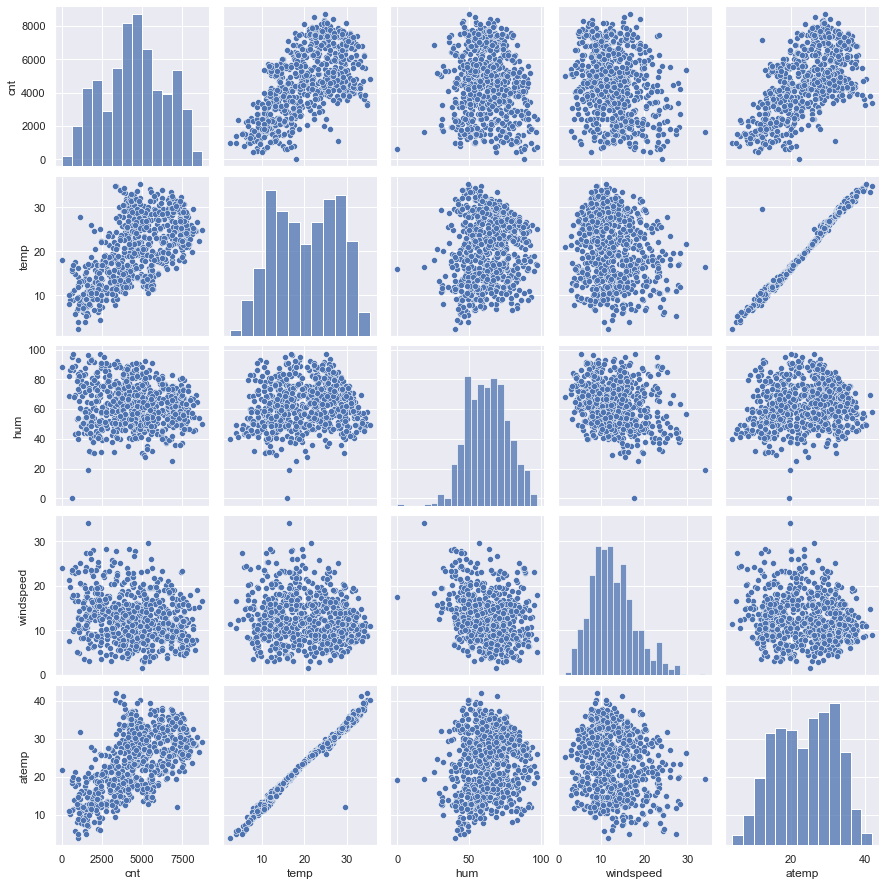

In [16]:
#  pairplot of only continous numerical variables

num_vars = ['cnt', 'temp', 'hum', 'windspeed', 'atemp']
sns.pairplot(bikes[num_vars], aspect=1)
plt.show()

**Observations:**

1. Target variable 'cnt' is highly postively co-related with independent variables such as 'temp', 'atemp'.


2. Target variable 'cnt' relation with independent variables such as 'hum' and 'windspeed' is not very well defined. It veering more on a negative co-relation.


3. Independent variables 'temp' and 'atemp' are highly co-related among themselves and could be case of multicollinearity
.


### 7.2 Visualising categorial data

We will make a boxplot for these categorical variables.

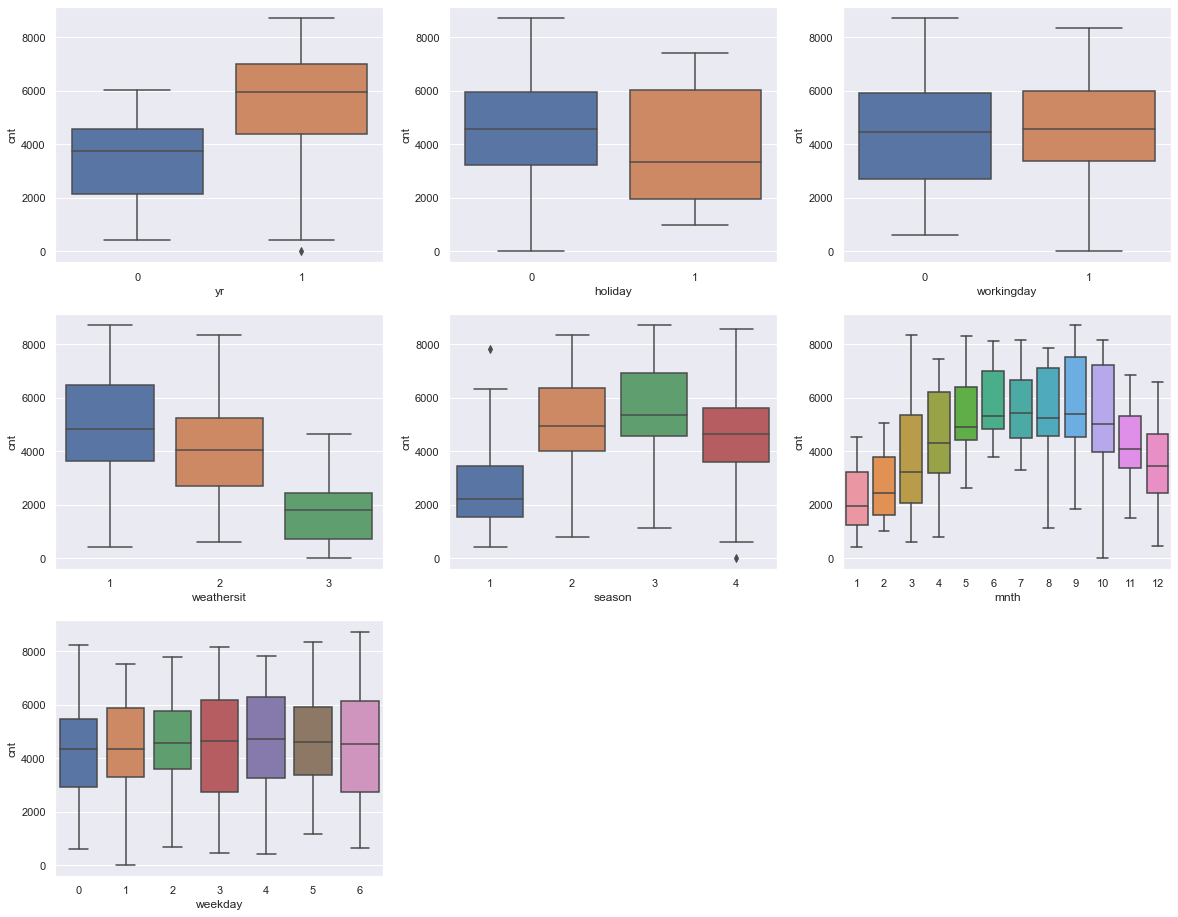

In [17]:
# boxplot of categorial variables

plt.figure(figsize=(20, 16))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.show()

**Observations:**

1. There are more rentals in year 2019 as compared to year 2018, showing that there is scope for increase in rental on year to year basis.


2. Average number of rentals are more on non-holidays as compared to holidays. This might mean that people rent more for business purpose such as going to work. The same is confirmed by the boxplot for working day.


3. Expectedly the number of rental went down during adverse weather condition number 3 which is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.


4. There is a marked reduction in bike rentals in season 1 (spring), where it is relatively high in summer, fall and surprisingly high in winter as well. This shows that biker population bike all year along.


5. Distribution of bike rental across months matches with distributions across seasons. 


6. The number of rental on weekday to weekend being same. This further proves that week day may not be a factor in bike rental.


7. There are no outliers worth of note in any of the above data.


### 7.3 Find co-relation using heatmap

We will plot a heatmap to get co-relation between target and independent variables and among themselves.

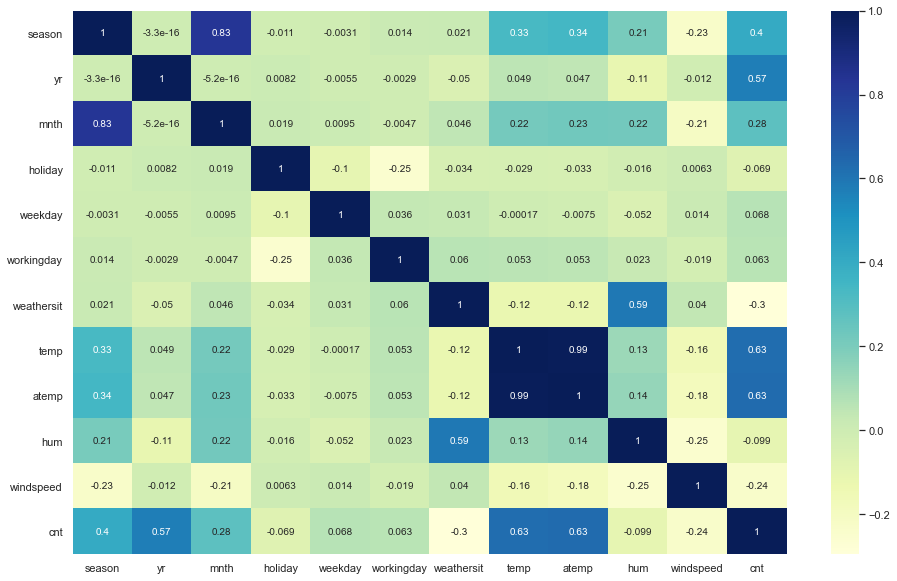

In [18]:
# Check the correlation coefficients to see which variables are highly correlated. 
# This will hint regarding multicollinearity as well as to on which independent variables the target variable depends.

plt.figure(figsize = (16, 10))
sns.heatmap(bikes.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observations:**

1. Number of bike rental is highly postively co-related with year. That means year on year the bike rental increases. That shows the demand for bike rental natuarlly increases and the market has to be captialised.


2. The number of bike rental is also highly postively correlated with temperature. Warmer the day, more likely are people to rent bikes.


3. There is moderate correlation of number of bike rentals with the month of the year. This may mean that people are likely to rent or not rent bike in certain months of the year.


4. Negative correlated variables such as holiday, weather pattern, humidity and wind are the variables which lower the demand.

### 7.4 Conclusions of Exploratory Data Analysis

Based up on previous observations, we can group drivers variables in following groups

**Positive Drivers**

These variables increase the demand for the rental. So company should check and the plan the stock for these days

-  Temperature of the days, higher the temperature higher the demand.

-  Year on year increase. Probably with growing population and awareness for health, there is natural increase in demand from one year to another.

- Working days, there is more demand on working days. 

- Season, with summer more perferred by the bikers.

**Negative Drivers**

These variables decrease the demand for the rental. So company should check and plan for the lean days.

- Adverse weather days such as Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.

- Wind speed, on higer wind speed days demand decreases perhaps due wind chill factor or wind resistance.

- Humidity, with higer humidity rentals seems to be negatively affected.

## 9. Data Preparation

We can observe that various columns 'season', 'mnth' and  'weathersit' are categorical data which have

- More than two levels

- They are un-ordered type, i.e. one value is not logically greater than other

Hence they need to be encoded using dummy variables

In [19]:
# List of variables to encode

varlist =  ['season', 'weathersit', 'mnth', 'weekday']

# we will drop the first column of each of the above set as n-1 levels are enough to describe a variable, if it has n levels

bikes = pd.get_dummies(data=bikes, columns=varlist, drop_first = True)

# rename columns for easy identification

bikes.rename(columns = {'season_2':'summer', 'season_3':'fall', 'season_4':'winter'}, inplace = True)
bikes.rename(columns = {'weathersit_2':'MistnCloudy', 'weathersit_3':'LightSnownStorms', 'season_4':'HeavySnownStorms'}, inplace = True)
bikes.rename(columns = {'mnth_2':'Feb', 'mnth_3':'Mar','mnth_4':'Apr','mnth_5':'May',\
                        'mnth_6':'Jun', 'mnth_7':'Jul', 'mnth_8':'Aug', 'mnth_9':'Sep',\
                        'mnth_10':'Oct', 'mnth_11':'Nov', 'mnth_12':'Dec'}, inplace = True)

# check the dataset after dummy creation

bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,MistnCloudy,LightSnownStorms,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 10. Creation of Training and Test Sets 

We will split the data in to training and test set, with training set being 70% of whole data and rest 30% being test set.

In [20]:
# Set the random number generator seed and random_state so that we alawys get the same set of data

np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 50)

## 11. Rescaling the Features 

The 'cnt' column has large range of values as well as columns as 'temp', 'atemp', 'hum' etc. We will all bring them to same
scale using **Min-Max scaling**, as it

1. Helps in faster convergence to minima during training.


2. It makes evaluation of the model easier.


In [21]:
# create the scaler object

scaler = MinMaxScaler()

# we will scale all varibles except the dummy variables

vars = ['temp', 'hum', 'windspeed', 'cnt', 'atemp']

bikes_train[vars] = scaler.fit_transform(bikes_train[vars])

# check the range of the values to confirm they have been scaled

bikes_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,MistnCloudy,LightSnownStorms,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.705882,0.552680,0.545242,0.644848,0.318203,0.509945,0.254902,0.24902,0.250980,0.341176,0.031373,0.076471,0.094118,0.074510,0.100000,0.082353,0.078431,0.088235,0.064706,0.086275,0.086275,0.094118,0.152941,0.149020,0.139216,0.145098,0.143137,0.135294
std,0.500179,0.151726,0.456092,0.230600,0.223322,0.149640,0.167086,0.223408,0.436234,0.43287,0.434003,0.474570,0.174494,0.266010,0.292279,0.262857,0.300295,0.275172,0.269113,0.283915,0.246248,0.281045,0.281045,0.292279,0.360284,0.356457,0.346511,0.352545,0.350557,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.345522,0.524581,0.197916,0.350523,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.556759,0.648347,0.295422,0.516222,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.732269,0.752576,0.406471,0.672141,1.000000,0.00000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observation**

All values within 0 and 1, so scaling was done correctly.

## 12. Building a Linear Regression model

**Our approach will be to use RFE to remove un-important features and reduce the list to 15 variables.**


**Then manually check and remove variables with high p value (i.e. low significance) and VIF (Variable Inflation Factor).**

### 12.1 Use RFE to filter out variables


In [22]:
# check the columns first

bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'summer', 'fall', 'winter', 'MistnCloudy', 'LightSnownStorms',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

In [23]:
# create object which will be used for RFE later on

lm = LinearRegression()

In [24]:
# build our y and X datasets for training

y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [25]:
# instruct RFE to find 15 significant variables

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [26]:
# list out the variables in ranking order

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('MistnCloudy', True, 1),
 ('LightSnownStorms', True, 1),
 ('Feb', False, 7),
 ('Mar', True, 1),
 ('Apr', False, 4),
 ('May', False, 2),
 ('Jun', False, 3),
 ('Jul', False, 6),
 ('Aug', False, 5),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 12),
 ('Dec', False, 13),
 ('weekday_1', False, 14),
 ('weekday_2', False, 15),
 ('weekday_3', False, 11),
 ('weekday_4', False, 10),
 ('weekday_5', False, 9),
 ('weekday_6', True, 1)]

In [27]:
# columns which will be used for fitting or training

col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'MistnCloudy', 'LightSnownStorms', 'Mar', 'Sep',
       'Oct', 'weekday_6'],
      dtype='object')

In [28]:
# columns which RFE deemed un-important

X_train.columns[~rfe.support_]

Index(['holiday', 'Feb', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Nov', 'Dec',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [29]:
# get our final training dataset

X_train_rfe = X_train[col]

### 12.2 Trial Model # 1

We will create our first trial model using the variables suggested by RFE.


In [30]:
# add constant to the data set

X_train_rfe = sm.add_constant(X_train_rfe)

In [31]:
# fit the data using OLS

lm = sm.OLS(y_train, X_train_rfe).fit()

In [32]:
# print the summary

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     188.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.14e-193
Time:                        14:32:20   Log-Likelihood:                 527.04
No. Observations:                 510   AIC:                            -1022.
Df Residuals:                     494   BIC:                            -954.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2057      0.028  

In [33]:
#  find the VIF of the variables

X_train_new = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,387.87
3,atemp,371.93
4,hum,18.62
7,fall,7.45
1,workingday,5.02
5,windspeed,4.06
6,summer,3.93
8,winter,3.03
9,MistnCloudy,2.25
0,yr,1.92


**Obeservations**

1. The R square is good at 0.85 .


2. But there are certain variables like atemp, Mar which have p value greater than 0.05. So they are statistically insignificant.


3. There are variables with very high VIF such as hum, temp, atemp and fall.


4. We will first drop variables with high p-value one bye one.



### 12.3 Trial Model # 2

We will drop atemp variable as it has p-value > 0.05

In [34]:
X_train_rfe = X_train_rfe.drop('atemp', axis=1)

lm = sm.OLS(y_train, X_train_rfe).fit()

# check the summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.33e-194
Time:                        14:32:20   Log-Likelihood:                 526.96
No. Observations:                 510   AIC:                            -1024.
Df Residuals:                     495   BIC:                            -960.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2061      0.028  

In [35]:
#  find the VIF of the variables

X_train_new = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,25.98
3,hum,18.15
6,fall,7.41
1,workingday,5.02
4,windspeed,3.93
5,summer,3.93
7,winter,3.02
8,MistnCloudy,2.24
0,yr,1.92
13,weekday_6,1.78


**Obeservations**

1. The R square is good at 0.85 .


3. Mar has high p-value 0.07, so we will drop it next.

### 12.4 Trial Model # 3

We will Mar variable as it has high p-value 0.07 which is greater than 0.05

In [36]:
X_train_rfe = X_train_rfe.drop('Mar', axis=1)

lm = sm.OLS(y_train, X_train_rfe).fit()

# check the summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          7.80e-195
Time:                        14:32:20   Log-Likelihood:                 525.29
No. Observations:                 510   AIC:                            -1023.
Df Residuals:                     496   BIC:                            -963.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2136      0.027  

In [37]:
#  find the VIF of the variables

X_train_new = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,25.86
3,hum,18.07
6,fall,7.08
1,workingday,4.98
4,windspeed,3.86
5,summer,3.82
7,winter,2.82
8,MistnCloudy,2.24
0,yr,1.92
12,weekday_6,1.77


Since we still have temp with VIF > 5, we will drop next insignificant variable with high VIF but with low correlation.
And that is workigday.

### 12.5 Trial Model # 4

We will drop **workingday** first as it has high VIF of 4.98 but low coefficient 0.0406

In [38]:
X_train_rfe = X_train_rfe.drop('workingday', axis=1)

lm = sm.OLS(y_train, X_train_rfe).fit()

# check the summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     227.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.86e-193
Time:                        14:32:20   Log-Likelihood:                 518.20
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     497   BIC:                            -955.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2460      0.026  

In [39]:
#  find the VIF of the variables

X_train_new = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,25.67
2,hum,15.99
5,fall,7.08
4,summer,3.82
3,windspeed,3.73
6,winter,2.82
7,MistnCloudy,2.24
0,yr,1.91
10,Oct,1.64
9,Sep,1.24


### 12.6 Trial Model # 5

We will drop **fall** next as it has high VIF of 7.98 but low coefficient 0.0506

In [40]:
X_train_rfe = X_train_rfe.drop('fall', axis=1)

lm = sm.OLS(y_train, X_train_rfe).fit()

# check the summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     244.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.03e-192
Time:                        14:32:20   Log-Likelihood:                 514.58
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     498   BIC:                            -954.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2411      0.026  

In [41]:
#  find the VIF of the variables

X_train_new = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,14.76
1,temp,8.37
3,windspeed,3.61
5,winter,2.25
6,MistnCloudy,2.22
0,yr,1.89
4,summer,1.62
9,Oct,1.59
7,LightSnownStorms,1.21
8,Sep,1.18


### 12.7 Trial Model # 6

Now the hum has high VIF > 5, so we will drop it next

In [42]:
X_train_rfe = X_train_rfe.drop('hum', axis=1)

lm = sm.OLS(y_train, X_train_rfe).fit()

# check the summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.10e-185
Time:                        14:32:20   Log-Likelihood:                 494.42
No. Observations:                 510   AIC:                            -966.8
Df Residuals:                     499   BIC:                            -920.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1083      0.017  

In [43]:
X_train_new = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.76
2,windspeed,3.23
0,yr,1.88
4,winter,1.84
3,summer,1.61
8,Oct,1.57
5,MistnCloudy,1.46
7,Sep,1.18
9,weekday_6,1.16
6,LightSnownStorms,1.09


### 12.8 Trial Model # 7

Now the Oct has high p-value  > 0.05, so we will drop it next

In [44]:
X_train_rfe = X_train_rfe.drop('Oct', axis=1)

lm = sm.OLS(y_train, X_train_rfe).fit()

# check the summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     270.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.49e-186
Time:                        14:32:20   Log-Likelihood:                 492.45
No. Observations:                 510   AIC:                            -964.9
Df Residuals:                     500   BIC:                            -922.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1032      0.017  

In [45]:
X_train_new = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.71
2,windspeed,3.22
0,yr,1.88
3,summer,1.61
5,MistnCloudy,1.45
4,winter,1.36
7,Sep,1.16
8,weekday_6,1.16
6,LightSnownStorms,1.09


**Observations:**

After 7 trials of models, we have a good model where,

- **Adjusted R square is 0.83, which means model is able to explain nearly 83% of variations as result of change in independent variables.**

- **p-values of variables is less than 0.04, which means that all the variables are statistcally significant and we can reject the null hypothesis of all betas being 0.**

- **VIF of independent variables is less than 5, which means that are no issue of multicollinearity.**

## 13. Residual Analysis of the training data

We will now validate the assumptions of linear regression

### 13.1 Asummption 1 : There is a linear relationship between X and Y

To check this, we will do a scatter plot between one of the significant variable temp (X) and bike rentals (Y)




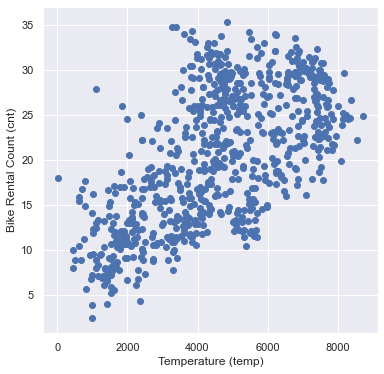

In [46]:
# scatter plot between temp and cnt

plt.figure(figsize=(6,6))
plt.scatter(bikes['cnt'], bikes['temp'])
plt.ylabel('Bike Rental Count (cnt)')
plt.xlabel('Temperature (temp)')
plt.show()  

Above plot shows that as temperature increases, bike rental number go increasing linearly

### 13.2 Assumption 2 : Errors terms are normally distributed

We will check with histogram of error terms 

<Figure size 432x432 with 0 Axes>

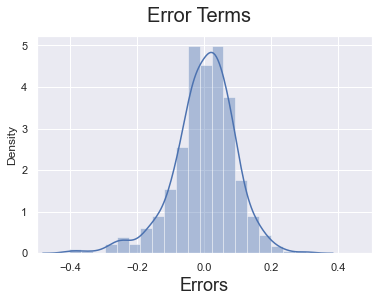

In [47]:
# we will first get pridcted count of bike rental

y_train_pred = lm.predict(X_train_rfe)

# find the residuals (error terms)

res = y_train - y_train_pred

# plot a histogram of residuals

plt.figure(figsize=(6,6))
fig = plt.figure()
ax = plt.gca()
ax.set_xlim(xmin=-0.5, xmax=0.5)
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

**Observation**

Above histogram shows a normal distribution of error terms, hence proving the this assumption of linear regression.

### 13.3 Assumption 3 : Error terms are independent of each other:

The error terms should not be dependent on one another. To verify this, we plotted a scatter plot between the error terms and prediction of count of rental (y_pred)  

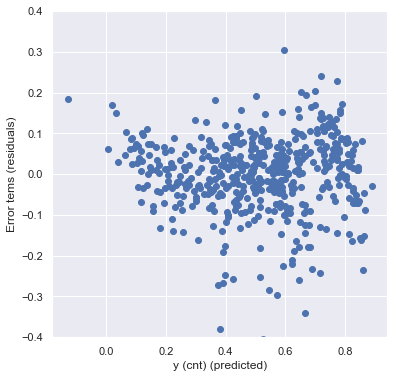

In [48]:
# plot error terms against prediction count of rental (y_pred)

plt.figure(figsize=(6,6))
ax = plt.gca()
ax.set_ylim(ymin=-0.4, ymax=0.4)
plt.scatter(y_train_pred, res)
plt.ylabel('Error tems (residuals)')
plt.xlabel('y (cnt) (predicted)')
plt.show()

Above plot shows that error terms do not show any constant pattern (increase or decrease) and are fairly randomly distributed and thus independent of each other.

### 13.4 Assumption 4 : Error terms have constant variance (homoscedasticity):

Following plot shows that the variance does not changes as the error values change.

Also, the variance does not follow any pattern as the error terms change.


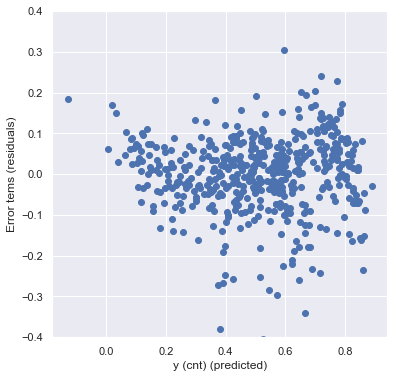

In [49]:
# plot error terms against predict count of rental (y_pred)

plt.figure(figsize=(6,6))
ax = plt.gca()
ax.set_ylim(ymin=-0.4, ymax=0.4)
plt.scatter(y_train_pred, res)
plt.ylabel('Error tems (residuals)')
plt.xlabel('y (cnt) (predicted)')
plt.show()

### 13.5 Additional considerations for Multiple Linear Regression

We can confirm that these additional considerations are valid as well.

1. Since the VIF values of independent variables is less than 5, we are confident that requirement of multicollinearity is satisfied.


2. R-square on test dataset is 0.78 while it was 0.83 on the training dataset. Since they are quite close it shows that model has generalised well on the test dataset and there is no over or under fitting.

## 14 Making predictions on test set

We will now make prediction on the test dataset and then find the R square for it to see how well the model fits and to see whether this is any under or over-fitting.

### 14.1 First apply the scaling on the test sets

In [50]:
# we will scale the numerical variables in the test dataset

vars = ['temp', 'hum', 'windspeed', 'cnt', 'atemp']

bikes_test[vars] = scaler.transform(bikes_test[vars])

### 14.2 Dividing into X_test and y_test

In [51]:
# we separate y from the X

y_test = bikes_test.pop('cnt')
X_test = bikes_test

### 14.3 We will use our final model # 7 to make predictions

In [52]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 

X_test_new = sm.add_constant(X_test_new)

In [53]:
# Making predictions

y_test_pred = lm.predict(X_test_new)

In [54]:
# calculate the residual for test dataset 

res_test = y_test - y_test_pred

## 15. Model Evaluation



### 15.1  Evaluation  using plot of prediction versus actual count of bike rental

Text(0, 0.5, 'y_pred')

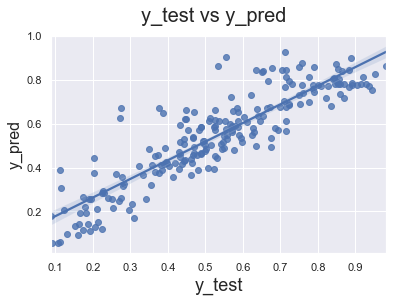

In [55]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

#### Conclusion : Our R-square on test is 0.78 while it was 0.83 on the training dataset. 
#### Since they are quite close it shows that model has generalised well on the test dataset and there is no over or under fitting.

We can see that the equation of our best fitted line is:

$ count = 0.103 \times constant + 0.2335  \times  year + 0.5672  \times  temperature + 0.0871 \times summer + 0.1345 \times winter + 0.0790 \times september + 0.0246 \times weekday_6 - 0.1547 \times windspeed - 0.0770 \times Mist and Cloudy - 0.2631 \times Light Snow and Storms $


#### Since actual versus predicted value fit the line, we have a decent model.

### 15.2  Evaluation on R-square for test add train dataset

In [56]:
print('Mean square error =', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-square (test) =", r2_score(y_test, y_test_pred))

Mean square error = 0.10316688992113833
R-square (test) = 0.7818327038350942


#### Our R-square on test is 0.78 while it was 0.83 on the training dataset. 
#### Since they are quite close it shows that model has generalised well on the test dataset and there is no over or under fitting.

### 16. Conclusions from final model

### 16.1 Variables that are significant in predicting the demand for shared bikes.

Following variables are significant

**Temperature of the day**

**Year of rental**

**Type of weather** (summer, winter)

**Month of the year** (in particular September)

**Week day** (specially Sunday)

**Season** (in particular summer and winter)

**Windspeed**

**Weather** (in particular Misty and Cloudy or Light Snow or Thunderstorm)


### 16.2 How variables describe the demand (Dynamics of the demand)

Based up on above variables and their coefficients, we can group drivers variables in following groups

**Positive Drivers**

These variables increase the demand for the rental. So company should check and the plan the stock for these days

-  **Temperature of the day** (Coeff 0.5672) - This has got big impact of the demand. Higher the temperature higher is the demand.


-  **Year**  (Coeff 0.2335) - Model shows that there is natural increase in demand from one year to another. Probably with growing population and awareness for health. So company can plan to increase production to meet this.


- **Week day 6 or Sunday** (Coeff 0.0246) - This is a weak indicator that demand is more on Sunday, it being a holiday.


- **Season**  - Rental increases particularly in summer (Coeff 0.0871) and winter as well (Coeff, 0.1345)


- **Month (September)** (Coeff 0.0790) - There is variatin with month, with september month being strongest in terms of increase in demand


**Negative Drivers**

These variables decrease the demand for the rental. So company should check and plan for the lean days.

- **Adverse weather days** (Coeff -0.2631 and - 0.0770)) - On bad weather days particularly  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, demand is very low.


- **Wind speed** (Coeff -0.1547), on higher wind speed days demand decreases perhaps due wind chill factor or wind resistance.



### 16.3 Model to describe the demand

The model is

$ count = 0.103 \times constant + 0.2335  \times  year + 0.5672  \times  temperature + 0.0871 \times summer + 0.1345 \times winter + 0.0790 \times september + 0.0246 \times weekday_6 - 0.1547 \times windspeed - 0.0770 \times Mist and Cloudy - 0.2631 \times Light Snow and Storms $
